## Project - Supervised Learning

Submitted by: Dr. Shrishail S. Gajbhar as part of the "Supervised Learning" module project evaluation.


### Dataset Information:

**Name: Bank_Personal_Loan_Modelling.csv**

**Domain: Banking**

**Aim: To classify in order to predict the likelihood of a liability bank customer for buying personal loan.**

## Learning Outcomes:

* Exploratory Data Analysis
* Preparing the data to train a model
* Training and making predictions using a classification model
* Model evaluation

## About the dataset, column attributes (independent variables) and target variable (dependent variable)
The dataset is related to the Banking sector where a bank (namely Thera bank) having information of about 5000 liability customers wants to benefit from the information to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). The data includes customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan) which saw a healthy conversion rate of 9.6% i.e., 480 out of 5000 liablility customers opted for personal loans. 

Now, the retail department of the bank wants to build a machine learning model in order devise campaigns with better target marketing to increase the success ratio with minimal budget. The model should help them identify the potential customers who have a higher probability of purchasing the loan which will eventually increase their success ratio at the reduced campaign cost. 

**There are total 14 attributes in the dataset and in the context of the given problem, the target (or dependent) attribute is "Personal Loan" whereas the remaining are independent attributes.**

**Attribute Information:**
* ID : Customer ID
* Age : Customer's age in completed years
* Experience : #years of professional experience
* Income : Annual income of the customer (\$000)
* ZIP Code : Home Address ZIP code.
* Family : Family size of the customer
* CCAvg : Avg. spending on credit cards per month (\$000)
* Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage : Value of house mortgage if any. (\$000)
* Securities Account : Does the customer have a securities account with the bank?
* CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
* Online : Does the customer use internet banking facilities?
* Credit card : Does the customer use a credit card issued by UniversalBank?
* Personal Loan : Did this customer accept the personal loan offered in the last campaign? (**Target Attribute**)

## 1) Analyzing the data distribution of each attribute and listing the relevant findings
**In this section, we will use Exploratory Data Analysis (EDA) tools and Applied Statistics concepts to verify the significance of each independent attribute towards predicting probability of a cutomer for buying the personal loan.**

In [1]:
# Importing the necessary libraries
import numpy as np #importing numpy library
import pandas as pd  # To read the dataset as dataframe
import seaborn as sns # For Data Visualization 
import matplotlib.pyplot as plt # Necessary module for plotting purpose
%matplotlib inline
from sklearn.model_selection import train_test_split # For train-test split
# getting methods for confusion matrix, F1 score, Accuracy Score
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression # For logistic Regression
from sklearn.naive_bayes import GaussianNB # For Naive Bayes classifier
from sklearn.neighbors import KNeighborsClassifier # For K-NN Classifier
from sklearn.svm import SVC # For support vector machine based classifier

In [2]:
# Reading the data as a data frame
df_orig = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df_orig.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Creating copy of original dataframe 
df = df_orig.copy()
# For our convinience, let us make target attribute "Personal Loan" as the last column 
# of our dataframe.
df.drop('Personal Loan',axis=1,inplace=True)
df['Personal Loan'] = df_orig['Personal Loan']

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [5]:
# Shape of dataframe
df.shape

(5000, 14)

**There are 5000 rows and 14 columns in this dataset.**

In [6]:
# More info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Personal Loan         5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


**By closely observing the data and description given about each column attribute we can say that:**
* **Numeric data columns (Interval or Ratio) are: Age, Experience, Income, Mortgage and CCAvg**
* **Ordinal Categorical columns are: Family and Education**
* **Nominal Categorical columns are: ID, ZIP Code, Securities Account, CD Account, Online, CreditCard, Personal Loan**

In [7]:
# The column (attribute) names are:
for name in df.columns:
    print(name)

ID
Age
Experience
Income
ZIP Code
Family
CCAvg
Education
Mortgage
Securities Account
CD Account
Online
CreditCard
Personal Loan


In [8]:
# Let us see datatypes of the column attributes
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

**Data type of column 'CCAvg' is float64, whereas remaining attributes are of type int64**

In [9]:
# Number of unique datatypes and their value count
df.dtypes.value_counts()

int64      13
float64     1
dtype: int64

In [10]:
# Let us check the dataset for missing values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

**One can see that, there are no missing values in any of the column attributes**

In [11]:
# Let us see the 5-point summary of for the attributes
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


**Observations:**
* **'Experience' column shows presence of negative entries (min=-3) which is wrong and needs to be handled appropriately.**
* Remaining numeric columns such as Age, Income, CCAvg, Mortgage seem to be fine and no data cleaning is required
* The customer ages are in the range of 23 to 67 with average age as 45. Quarter of the customer population is below 35.
* Columns with binary information such as Securities Account, CD Account, Online, CreditCard, Personal Loan are also clean.

In [12]:
# Let us see how many negative entries are there in the Experience column
df[df['Experience']<0].Experience.count()

52

**There are 52 negative entries in the Experience column**

In [13]:
# Let us see how many unique negative entries are there?
df[df['Experience']<0].Experience.value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

There there unique negative entries -1,-2 and -3 in the experience column.

**Let us clean the Experience column by removing the negative entries with appropriate values**

In order to get the appropriate values, let take a cue from correlation of Experience attribute with other attributes

In [14]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.016972,-0.006909,-0.002528,0.017028,-0.024801
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.001232,0.010353,0.013898,0.008967,-0.007413
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691,0.000107
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366889
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Securities Account,-0.016972,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954


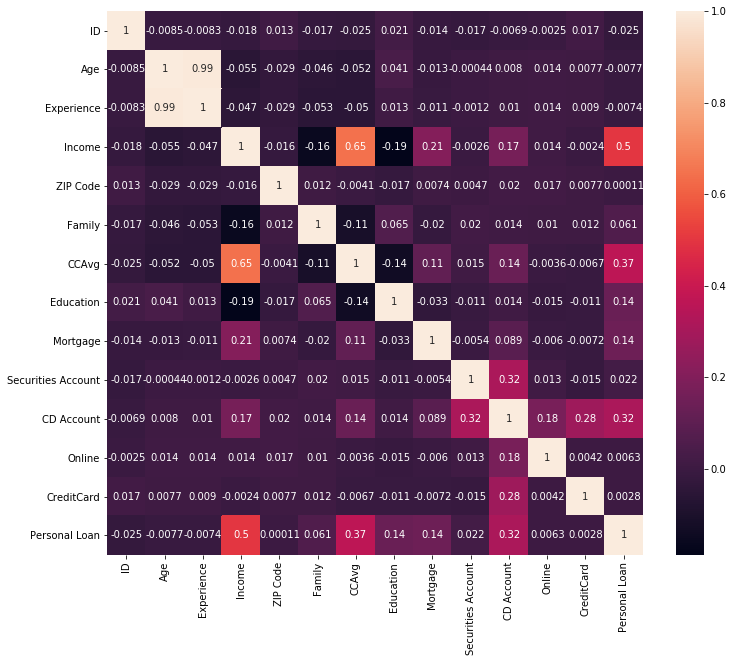

In [15]:
# Above table represented more elegently using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

**One can see that Experience attribute is highly correlated with the Age attribute so we will use this for our data cleaning purpose**

In [16]:
# Let us find the unique ages which have -1, -2 and -3 entries in the Experience column
df[df['Experience'] == -1]['Age'].value_counts()

25    17
24     6
23     6
29     3
26     1
Name: Age, dtype: int64

In [17]:
# We will find the mean of positive experience values for above ages and use it to replace all the experience entries 
# having -1 value
l1 = df[df['Experience'] == -1]['Age'].value_counts().index.tolist()
ind_1 = df[df['Experience'] == -1]['Experience'].index.tolist()
for i in ind_1:
    df.loc[i,'Experience'] = df[(df['Age'].isin(l1)) & (df.Experience > 0)].Experience.mean()

In [18]:
# Let us check the values are correctly replaced.
df[df['Experience'] == -1]['Age'].value_counts()

Series([], Name: Age, dtype: int64)

In [19]:
df[df['Experience'] == -2]['Age'].value_counts()

24    9
23    4
28    1
25    1
Name: Age, dtype: int64

In [20]:
# We will find the mean of positive experience values for above ages and use it to replace all the experience entries 
# having -2 value
l2 = df[df['Experience'] == -2]['Age'].value_counts().index.tolist()
ind_2 = df[df['Experience'] == -2]['Experience'].index.tolist()
for i in ind_2:
    df.loc[i,'Experience'] = df[(df['Age'].isin(l2)) & (df.Experience > 0)].Experience.mean()

In [21]:
df[df['Experience'] == -3]['Age'].value_counts()

23    2
24    2
Name: Age, dtype: int64

In [22]:
# We will find the mean of positive experience values for above ages and use it to replace all the experience entries 
# having -3 value
l3 = df[df['Experience'] == -3]['Age'].value_counts().index.tolist()
ind_3 = df[df['Experience'] == -3]['Experience'].index.tolist()
for i in ind_3:
    df.loc[i,'Experience'] = df[(df['Age'].isin(l3)) & (df.Experience > 0)].Experience.mean()

In [23]:
df.Experience.describe()

count    5000.000000
mean       20.149833
std        11.391004
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

#### Now we have a clean data to work with...!

In [24]:
# Let us see the distribution 5000 entries in target column
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

**480 customers out of 5000 had opted for personal loan in the previous campaign**

In [25]:
# The column attribute "ID" doesn't provide any significant information about a customer
# buying a personal loan hence we will skip analysis of the same.

**Analyzing the Age attribute**

Text(0.5, 1.0, 'Age Distribution')

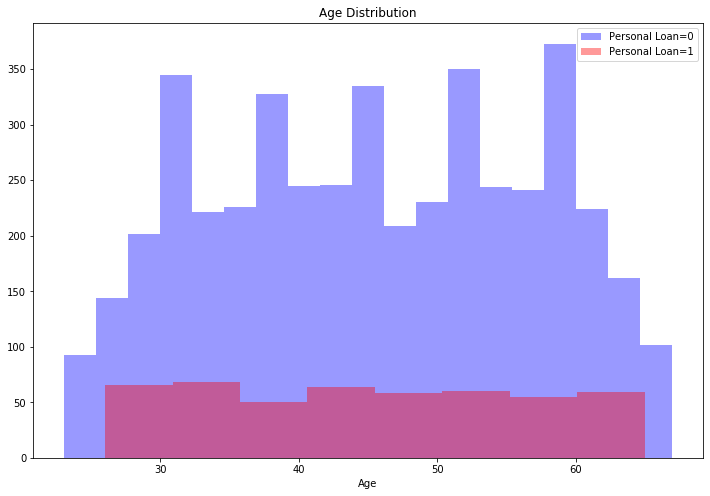

In [26]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Personal Loan'] == 0]['Age'],kde=False, color='b', label='Personal Loan=0')
sns.distplot(df[df['Personal Loan'] == 1]['Age'],kde=False, color='r',label='Personal Loan=1')
plt.legend()
plt.title("Age Distribution")

In [27]:
age_cut = pd.cut(df['Age'],bins=[20,30,40,50,60])
pd.crosstab(age_cut,df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Age,,
"(20, 30]",89.423077,10.576923
"(30, 40]",90.453074,9.546926
"(40, 50]",90.393701,9.606299
"(50, 60]",91.307634,8.692366


**From above table as well as distribution plot of Age attribute, one can observe that most of the customers lie in the age group of 30 to 60. Also,one can observe that 10.5% of the total customers in age group 20-30 have bought personal loan from the bank, while in age groups (30-40), (40-50) and (50-60), there is a conversion rate of around 9%.**

**Analyzing the Experience attribute**

Text(0.5, 1.0, 'Experience Distribution')

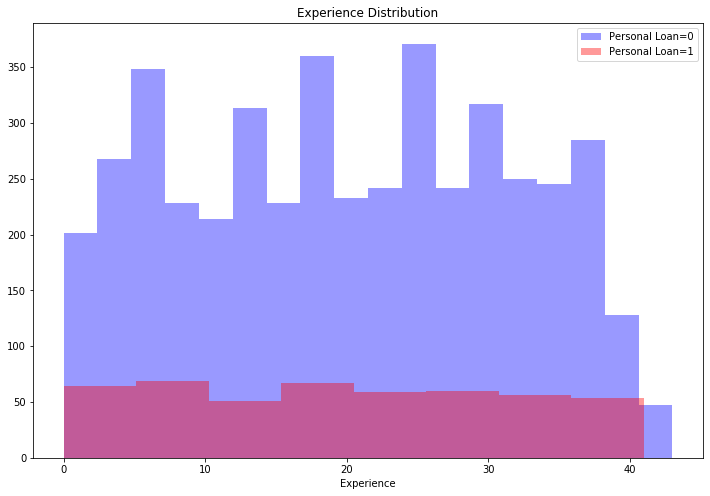

In [28]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Personal Loan'] == 0]['Experience'],kde=False, color='b', label='Personal Loan=0')
sns.distplot(df[df['Personal Loan'] == 1]['Experience'],kde=False, color='r',label='Personal Loan=1')
plt.legend()
plt.title("Experience Distribution")

In [29]:
exp_cut = pd.cut(df['Experience'],bins=[0,10,20,30,40,50])
pd.crosstab(exp_cut,df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Experience,,
"(0, 10]",89.697465,10.302535
"(10, 20]",90.582602,9.417398
"(20, 30]",90.853190,9.146810
"(30, 40]",90.661831,9.338169
"(40, 50]",87.037037,12.962963


**One can observe that out of the total customers with experience in the range 40-50 show a good conversion rate of almost 13% for buying the personal loan, a healthy conversion rate of about 10.30% in the experience range 0 to 10, while in the ranges (10-20), (20-30) and (30-40) years of experience it is around 9%.**

**Analyzing the Income attribute**

Text(0.5, 1.0, 'Income Distribution')

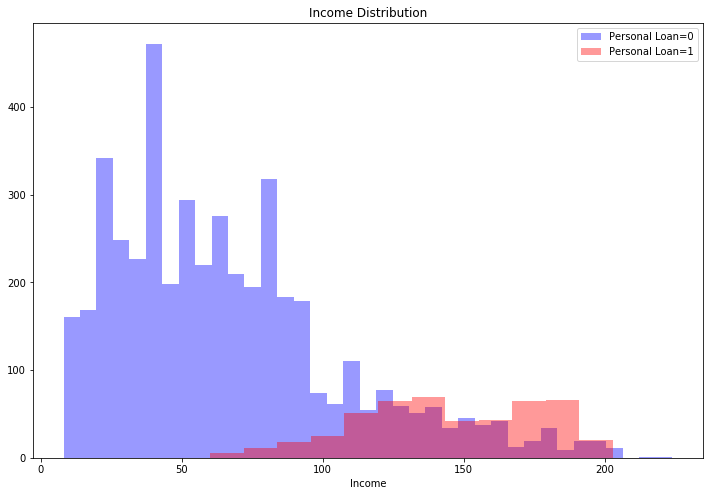

In [30]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Personal Loan'] == 0]['Income'],kde=False, color='b', label='Personal Loan=0')
sns.distplot(df[df['Personal Loan'] == 1]['Income'],kde=False, color='r',label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")

In [31]:
inc_cut = pd.cut(df['Income'],bins=[0,50,100,150,200,250])
pd.crosstab(inc_cut,df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Income,,
"(0, 50]",100.000000,0.000000
"(50, 100]",97.758805,2.241195
"(100, 150]",71.428571,28.571429
"(150, 200]",49.530516,50.469484
"(200, 250]",81.250000,18.750000


**No customer with income < 50,000\$ opted for the personal loan where as half of the cutomers with income within the range of 150 to 200 thousand dollars purchased personal loan...! Customers within range of (100 to 150) and (200 to 250) thousand dollars showed a conversion rate of about 28.5% and 18.75%, respectively.**

**Analyzing the Family attribute**

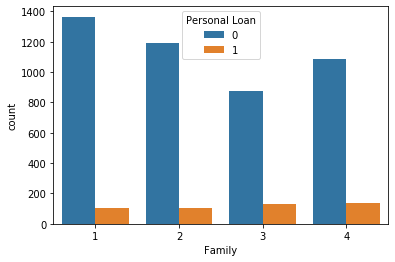

In [32]:
# Since it is a ordinal categorical variable, we will use countplot
sns.countplot(x='Family',hue='Personal Loan',data=df)

In [33]:
pd.crosstab(df['Family'],df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Family,,
1,92.730978,7.269022
2,91.820988,8.179012
3,86.831683,13.168317
4,89.034370,10.965630


**About 13% customers with family size of 3 and 11% customers with family size of 4, purchased personal loans from the bank.**

In [34]:
# Similar to ID attribute, we drop ZIP Code column analysis since it is not relevant to customer 
# buying the personal loan 

**Analyzing the CCAvg attribute**

Text(0.5, 1.0, 'CCAvg Distribution')

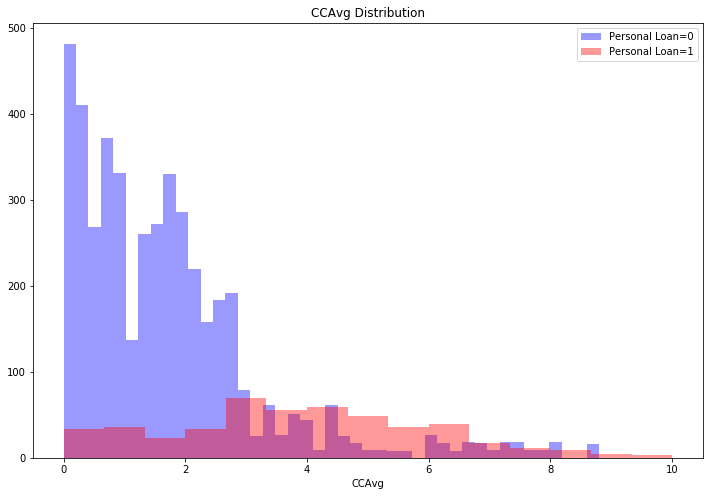

In [35]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Personal Loan'] == 0]['CCAvg'],kde=False, color='b', label='Personal Loan=0')
sns.distplot(df[df['Personal Loan'] == 1]['CCAvg'],kde=False, color='r',label='Personal Loan=1')
plt.legend()
plt.title("CCAvg Distribution")

In [36]:
ccavg_cut = pd.cut(df['CCAvg'],bins=[0,2,4,6,8,10])
pd.crosstab(ccavg_cut,df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
CCAvg,,
"(0, 2]",96.975486,3.024514
"(2, 4]",86.450540,13.549460
"(4, 6]",53.074434,46.925566
"(6, 8]",69.306931,30.693069
"(8, 10]",64.102564,35.897436


**One can see that, CCAvg shows good correlation with target attribute. Customers with more average spending on credit cards per month also show more tendancy to buy the personal loans. Customers with avg. credit card spending in the range of 4 to 6 thousand dollars show around 47% conversion rate.**

**Analyzing the Education attribute**

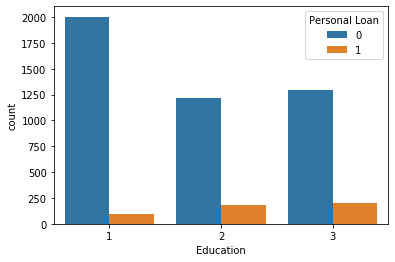

In [37]:
# Since Education is an ordinal categorical variable, we will use countplot
sns.countplot(df['Education'],hue=df['Personal Loan'])

In [38]:
pd.crosstab(df['Education'],df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Education,,
1,95.562977,4.437023
2,87.027798,12.972202
3,86.342438,13.657562


**Customers with "graduate" and "Advanced/Professional" education levels show a good conversion rate of about 13% and 13.65%, respectively.**

**Analyzing the Mortgage attribute**

Text(0.5, 1.0, 'Mortgage Distribution')

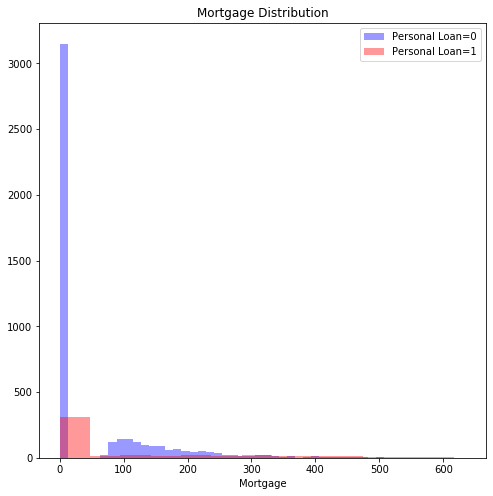

In [39]:
plt.figure(figsize=(8,8))
sns.distplot(df[df['Personal Loan'] == 0]['Mortgage'],kde=False, color='b', label='Personal Loan=0')
sns.distplot(df[df['Personal Loan'] == 1]['Mortgage'],kde=False, color='r',label='Personal Loan=1')
plt.legend()
plt.title("Mortgage Distribution")

In [40]:
mort_cut = pd.cut(df['Mortgage'],bins=[0,100,200,300,400,500,600])
pd.crosstab(mort_cut,df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Mortgage,,
"(0, 100]",95.390071,4.609929
"(100, 200]",94.854881,5.145119
"(200, 300]",86.531987,13.468013
"(300, 400]",68.750000,31.250000
"(400, 500]",58.333333,41.666667
"(500, 600]",33.333333,66.666667


**Customers having house Mortgage value in the ranges (300 to 400), (400 to 500) and (500 to 600) show good tendency to buy the personal loans.** 

**Analyzing the binary variables Securities Account, CD Account, Online and CreditCard**

Since they are nominal variables we will use count plot and box plots for analysis

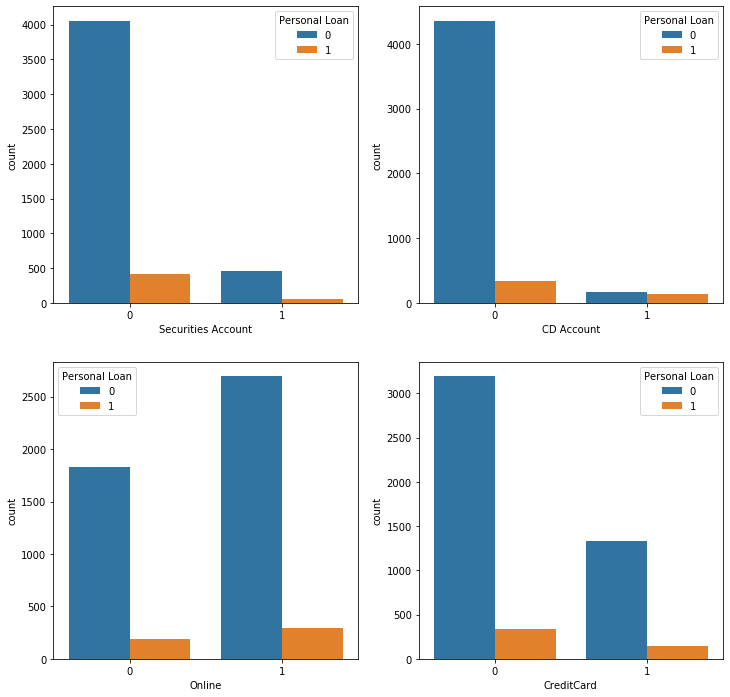

In [41]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.countplot(df['Securities Account'],hue=df['Personal Loan'])
plt.subplot(2,2,2)
sns.countplot(df['CD Account'],hue=df['Personal Loan'])
plt.subplot(2,2,3)
sns.countplot(df['Online'],hue=df['Personal Loan'])
plt.subplot(2,2,4)
sns.countplot(df['CreditCard'],hue=df['Personal Loan'])

In [42]:
pd.crosstab(df['Securities Account'],df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Securities Account,,
0,90.620813,9.379187
1,88.505747,11.494253


**Customers with Securities account have slightly higher percentage of buying the personal loan than the customers with no Securities account**

In [43]:
pd.crosstab(df['CD Account'],df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
CD Account,,
0,92.762878,7.237122
1,53.642384,46.357616


**Customers with CD account have very high percentage (46.3%) of buying the personal loan than the customers with no CD account (7.2%)**

In [44]:
pd.crosstab(df['Online'],df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Online,,
0,90.625000,9.375000
1,90.247989,9.752011


**Looks like customer using internet banking facilities has no effect on buying the personal loans..!**

In [45]:
pd.crosstab(df['CreditCard'],df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
CreditCard,,
0,90.453258,9.546742
1,90.272109,9.727891


**Similar to Online attribute, customer using using a credit card issued by UniversalBank has no effect on buying the personal loans.**

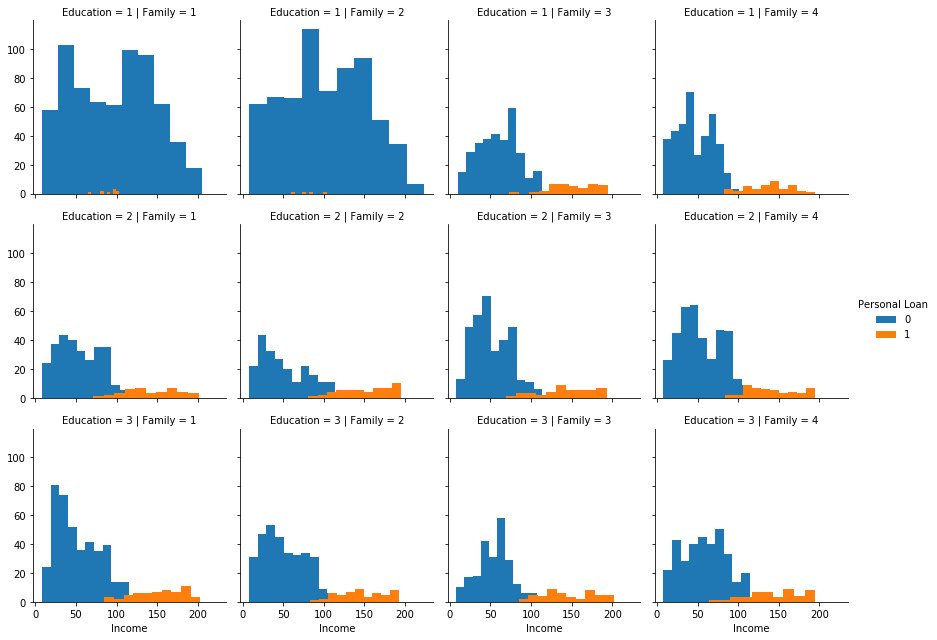

In [46]:
sns.FacetGrid(data=df,row='Education',col='Family',hue='Personal Loan').map(plt.hist,'Income').add_legend()

**Irrespective of their income, undergraduate customers with 1 or 2 family members generally do not opt for personal loans.**

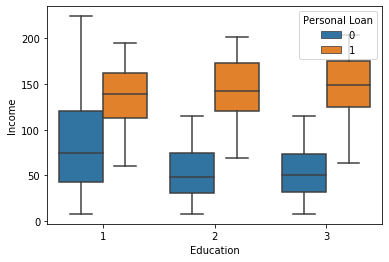

In [47]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

**In each education category, one can see that customers with higher the income tend to buy personal Loans.**

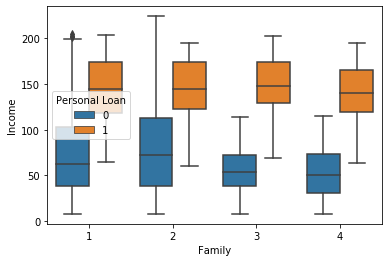

In [48]:
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=df)

**For customers with 1,2,3 or 4 family members, higher income is an important factor to  buy personal Loans.**

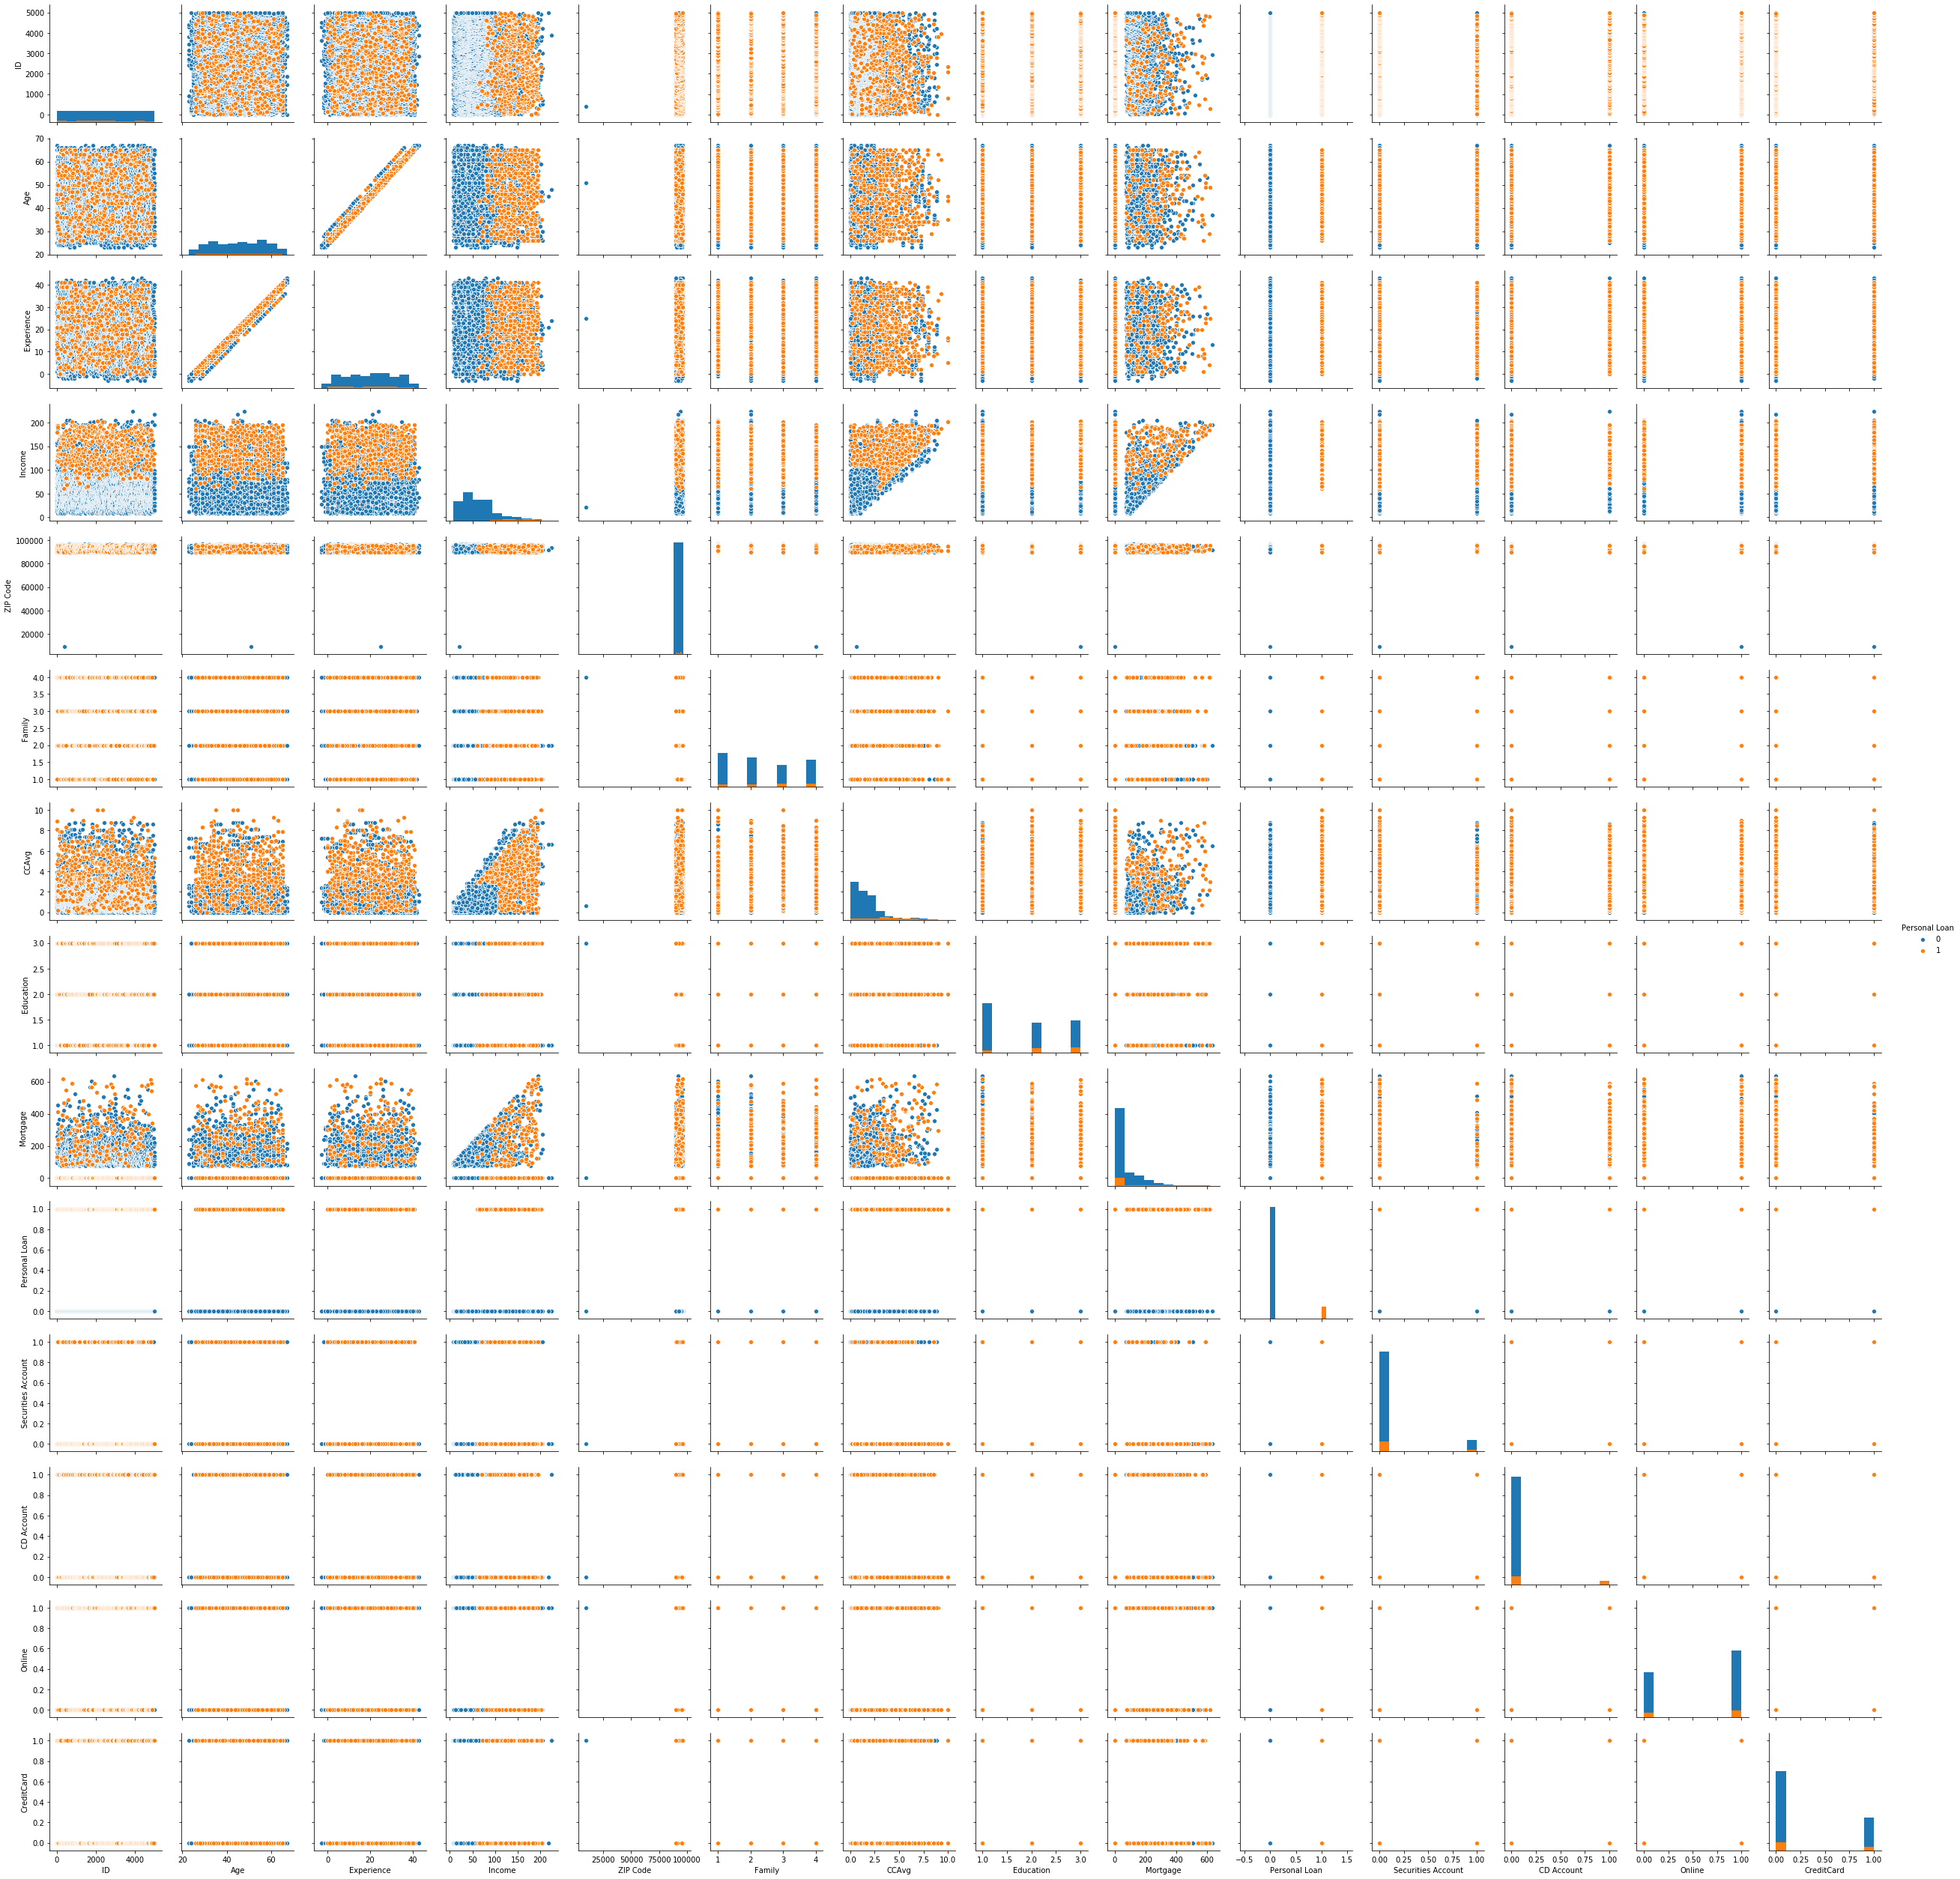

In [49]:
# Before moving further, let us plot the pairplot using all attributes
sns.pairplot(df_orig,hue='Personal Loan',diag_kind='hist')

**Observations**
* Age has a positive linear relationship with Experience
* Income, CCAvg, Mortgage histograms are not normally distributed

### Analyzing the statistical significance of relevant independent attributes for target attribute prediction 

In [50]:
# Let us see the correlation of all independent attributes with target attribute i.e., personal loan 
df.corr().loc['Personal Loan',:].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIP Code              0.000107
Age                  -0.007726
Experience           -0.008757
ID                   -0.024801
Name: Personal Loan, dtype: float64

**From qualitative and quantitative exploratory data analysis done until now, one can see that Income and CCAvg are two most important features deciding whether a customer will buy a personal loan or not. Other attributes such as CD Account, Mortgage, Education, Family, Securities Account are also of some importance as per their mentioned order. But, let us verify the importance of above attributes using statistical approach.**

**Since, Age and Experience have very low correlation with target attribute, they seem to be ineffective for predicting whether customer will buy a personal loan or not. But is this statement statistically correct? Whether Age and Experience have no influence in predicting the target attribute?**

Note: since, Age and Experience are highly correlated, we can drop one of them in the analysis.

In [51]:
# Significance test for numerical columns
import statsmodels.api as sm
df_num = df.loc[:,['Personal Loan', 'Income', 'CCAvg', 'CD Account', 'Mortgage', 'Education', 'Family', 'Securities Account', 'Age']]
df_num['intercept'] = 1
log_mod = sm.Logit(df_num['Personal Loan'], df_num[['intercept', 'Income', 'CCAvg', 'Mortgage', 'Age']]).fit()

Optimization terminated successfully.
         Current function value: 0.200574
         Iterations 8


In [52]:
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4995
Method:                           MLE   Df Model:                            4
Date:                Fri, 24 Jan 2020   Pseudo R-squ.:                  0.3657
Time:                        12:19:06   Log-Likelihood:                -1002.9
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                4.742e-249
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -6.5144      0.308    -21.155      0.000      -7.118      -5.911
Income         0.0351      0.002     22.313      0.000       0.032       0.038
CCAvg          0.0688      0.029      2.409      0.016       0.013       0.125
Mortgage       0.0007      0.000      1.757      0.079   -8.49e-05       0.002
Age            0.0080      0.005      1.550      0.121      -0.002       0.018
==============================================================================
"""

**One can see that, $p$-values for Income, CCAvg are less than $\alpha = 0.05$. Hence with 95% confidence, we can say that they are significant for predicting the target attribute class. Age attribute seems to be insignificant for the given problem**

In [53]:
# Let see the statistical significance of ordinal categorical variables Family and Education
df_ordc = df.loc[:,['Personal Loan','Family','Education']]
df_ordc['intercept'] = 1
log_mod = sm.Logit(df_ordc['Personal Loan'], df_ordc[['intercept', 'Family', 'Education']]).fit()

Optimization terminated successfully.
         Current function value: 0.305406
         Iterations 7


In [54]:
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4997
Method:                           MLE   Df Model:                            2
Date:                Fri, 24 Jan 2020   Pseudo R-squ.:                 0.03415
Time:                        12:19:06   Log-Likelihood:                -1527.0
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                 3.575e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.7670      0.175    -21.574      0.000      -4.109      -3.425
Family         0.1623      0.042      3.863      0.000       0.080       0.245
Education      0.5487      0.059      9.260      0.000       0.433       0.665
==============================================================================
"""

**By observing p-values of Family and Education, we can say that both the attributes are significant for predicting the target attribute class**

**In the context of independent categorical variables with binary response, one can see by observing their correlation with target attribute that only CD Account shows better correlation whereas Securities Account is slightly correlated. Let us verify them statistically for their significance**

In [55]:
df_bc = df.loc[:,['Personal Loan','CD Account','Securities Account']]
df_bc['intercept'] = 1
log_mod = sm.Logit(df_bc['Personal Loan'], df_bc[['intercept', 'CD Account','Securities Account']]).fit()

Optimization terminated successfully.
         Current function value: 0.282368
         Iterations 7


In [56]:
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4997
Method:                           MLE   Df Model:                            2
Date:                Fri, 24 Jan 2020   Pseudo R-squ.:                  0.1070
Time:                        12:19:07   Log-Likelihood:                -1411.8
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                 3.364e-74
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept             -2.4956      0.057    -43.991      0.000      -2.607      -2.384
CD Account             2.8403      0.155     18.272      0.000       2.536       3.145
Securities Account    -1.0295      0.190     -5.407      0.000      -1.403      -0.656
======================================================================================
"""

**Since the p-values are less than 0.05, both the attributes are useful for target class prediction**

In [57]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1.0,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,1,0


## 2) Getting the target column distribution

In [58]:
# Since target attribute is binary in nature, let us see count for each class
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

**One can see that out of 5000 customers 480 cutomers opted for the personal loan**

In [59]:
# Converting above target class distribution as dataframe
df_target = df['Personal Loan'].value_counts()
df_target = pd.DataFrame({'class':df_target.index, 'count':df_target.values})

In [60]:
df_target

,class,count
0,0,4520
1,1,480


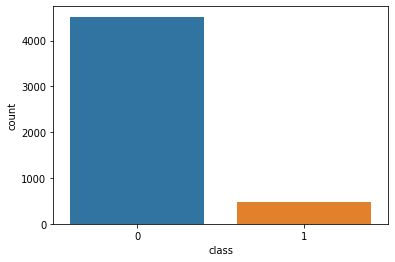

In [61]:
# barplot for target column distribution
sns.barplot(x='class',y = 'count',data=df_target);

In [62]:
# Let us add the percentage column to the dataframe.
df_target['Percentage'] = df_target['count']/df_target['count'].sum()*100
df_target

,class,count,Percentage
0,0,4520,90.4
1,1,480,9.6


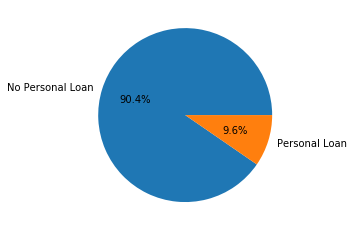

In [63]:
# Let us plot the Pie Plot
plt.pie(df_target['Percentage'],labels=['No Personal Loan','Personal Loan'],autopct= '%1.1f%%');

**One can see that, 9.6% of the total customers bought the personal loan in the previous campaign** 

**Observation: Clearly, there is a high amount of class imbalance in the target attribute..!**

## 4) Split the data into training and test set in the ratio of 70:30 respectively

In [64]:
# Train test split
# We will drop the Age, ID columns from training as well as test dataset
X = df.iloc[:,2:-1]
y = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 7 )

## 5) Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans

**About metrics used for evaluation** 

In order to minimize the cost of campaigning for the bank, a classifation algorithm in this context, should minimize both false positives (FP) as well as false negatives (FN). Hence, along with accuracy score, we will also observe f1-score. Ideally, both accuracy as well as f1-score should be 1 (or 100 in terms of percentage).

**We will first evaluate the model performances on unscaled data with their default parameters**

### Logistic Regression

In [65]:
# create model using constructor
LogRegModel = LogisticRegression()
# fit the model to training set
LogRegModel.fit(X_train,y_train)
# Predict the test data to get y_pred
y_pred = LogRegModel.predict(X_test)
# get accuracy of model
lr_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
lr_f1_score = f1_score(y_test,y_pred) 
# get the confusion matrix
lr_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
lr_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(lr_acc_score*100))
print("The f1-score of the model is {} %".format(lr_f1_score*100))
print("The confusion matrix for logistic regression is: \n",lr_confmat)
print("Detailed classification report for logistic regression is: \n",lr_classrep)

The accuracy of the model is 91.8 %
The f1-score of the model is 40.57971014492754 %
The confusion matrix for logistic regression is: 
 [[1335   27]
 [  96   42]]
Detailed classification report for logistic regression is: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      1362
           1       0.61      0.30      0.41       138

    accuracy                           0.92      1500
   macro avg       0.77      0.64      0.68      1500
weighted avg       0.90      0.92      0.91      1500



C:\Users\Main\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Observations: One can see that although accuracy is good, f1-score is low in this case i.e., precision and recall values are not upto the mark especially recall value is low (.31) for class 1**

**Recall value of 31% means, out of all the customers who would actually buy the loan, only 31% were correctly predicted to be positive (would buy the personal loan) thus bank is missing on 69% of potential customers resulting in recampaigning cost**

**60% of precision value means out of all positively predicted customers (who would buy the personal loan) only 60% were correctly predicted.**

### Naive Bayes Classifier

In [66]:
# create model using constructor
NBModel = GaussianNB()
# fit the model to training set
NBModel.fit(X_train,y_train)
# Predict the test data to get y_pred
y_pred = NBModel.predict(X_test)
# get accuracy of model
nb_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
nb_f1_score = f1_score(y_test,y_pred) 
# get the confusion matrix
nb_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
nb_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(nb_acc_score*100))
print("The f1-score of the model is {} %".format(nb_f1_score*100))
print("The confusion matrix for Naive Bayes classifier is: \n",nb_confmat)
print("Detailed classification report for Naive Bayes classifier is: \n",nb_classrep)

The accuracy of the model is 88.0 %
The f1-score of the model is 47.67441860465116 %
The confusion matrix for Naive Bayes classifier is: 
 [[1238  124]
 [  56   82]]
Detailed classification report for Naive Bayes classifier is: 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      1362
           1       0.40      0.59      0.48       138

    accuracy                           0.88      1500
   macro avg       0.68      0.75      0.70      1500
weighted avg       0.91      0.88      0.89      1500



**Observations: One can see that the although accuracy is decreased slightly than logistic regression case, use of Naive Bayes Classifier for this problem shows improved f1-score. Recall value is improved in case of class 1**

### K-NN Classifier

In [67]:
# create model using constructor
KNNModel = KNeighborsClassifier() # Calling default constructor
# fit the model to training set
KNNModel.fit(X_train,y_train)
# Predict the test data to get y_pred
y_pred = KNNModel.predict(X_test)
# get accuracy of model
knn_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
knn_f1_score = f1_score(y_test,y_pred) 
# get the confusion matrix
knn_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
knn_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(knn_acc_score*100))
print("The f1-score of the model is {} %".format(knn_f1_score*100))
print("The confusion matrix for K-NN classifier is: \n",knn_confmat)
print("Detailed classification report for K-NN classifier is: \n",knn_classrep)

The accuracy of the model is 91.26666666666667 %
The f1-score of the model is 33.50253807106599 %
The confusion matrix for K-NN classifier is: 
 [[1336   26]
 [ 105   33]]
Detailed classification report for K-NN classifier is: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1362
           1       0.56      0.24      0.34       138

    accuracy                           0.91      1500
   macro avg       0.74      0.61      0.64      1500
weighted avg       0.89      0.91      0.90      1500



**One can see that the although accuracy is similar to logistic regression case, f1-score is lowest among the compared algorithms. Recall value is merely .24 in case of class 1 i.e., out of all the customers who would actually buy the loan, only 24% were correctly predicted to be positive (would buy the personal loan) thus bank is missing on 76% of potential customers**

## Comparison of Classification Algorithms used for this problem

In [68]:
df_comp = pd.DataFrame({'Classification Algorithm':['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbor'],'Accuracy (%)':[lr_acc_score*100,nb_acc_score*100,knn_acc_score*100],'f1-score (%)':[lr_f1_score*100,nb_f1_score*100,knn_f1_score*100]})

print("Following table shows comparison of the classification algorithms (using unscaled data and default parameters): ")
df_comp

Following table shows comparison of the classification algorithms (using unscaled data and default parameters): 


,Classification Algorithm,Accuracy (%),f1-score (%)
0,Logistic Regression,91.800000,40.579710
1,Naive Bayes,88.000000,47.674419
2,K-Nearest Neighbor,91.266667,33.502538


## Reasoning for the best model and why it performs better? (Assuming unscaled data and algorithms with default parameters)

**If we consider the algorithm comparison with their default parameters and unscaled data, Naive bayes classifier works best which has accuracy of 88% and f1-score of 47.67%. The reason it performs better because Naive Bayes classifier assumes the independence of the X variables (i.e., independent variables) and for this particular problem this is approximately true which is clear from the following heatmap**

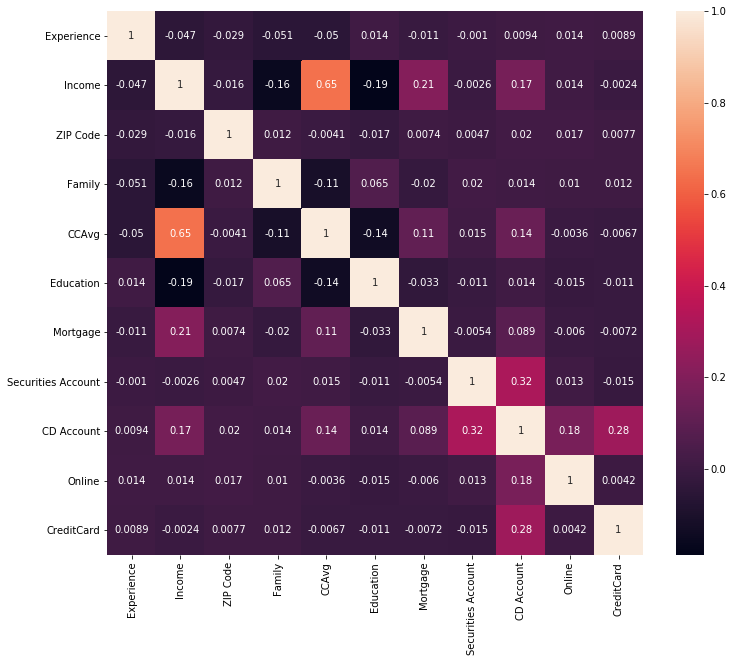

In [69]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(),annot=True)

**One can see that except CCAvg and income, there is no significant correlation among other column attributes of X**

## Trying K-NN with different neighbors on unscaled data.
In this section, we will try to find the accuracy and f1 score for KNN model with different values for neighbors.

In [70]:
# KNN Accuracy for neighbors = 1,3,...99
knn_acc=[]
knn_f1 = []
for i in range(1,100,2):
    print("Calculating the K-NN classifier accuracy for {} neighbors.".format(i))
    # create model using constructor
    KNNModel = KNeighborsClassifier(n_neighbors=i) # Calling default constructor
    # fit the model to training set
    KNNModel.fit(X_train,y_train)
    # Predict the test data to get y_pred
    y_pred = KNNModel.predict(X_test)
    # get accuracy of model
    knn_acc_score = accuracy_score(y_test,y_pred)
    knn_acc.append(knn_acc_score*100)
    # get F1-score of model
    knn_f1_score = f1_score(y_test,y_pred) 
    knn_f1.append(knn_f1_score*100)
df_knn = pd.DataFrame({'n_neighbors':list(range(1,100,2)), 'Accuracy':knn_acc,'f1-score':knn_f1})  

Calculating the K-NN classifier accuracy for 1 neighbors.
Calculating the K-NN classifier accuracy for 3 neighbors.
Calculating the K-NN classifier accuracy for 5 neighbors.
Calculating the K-NN classifier accuracy for 7 neighbors.
Calculating the K-NN classifier accuracy for 9 neighbors.
Calculating the K-NN classifier accuracy for 11 neighbors.
Calculating the K-NN classifier accuracy for 13 neighbors.
Calculating the K-NN classifier accuracy for 15 neighbors.
Calculating the K-NN classifier accuracy for 17 neighbors.
Calculating the K-NN classifier accuracy for 19 neighbors.
Calculating the K-NN classifier accuracy for 21 neighbors.
Calculating the K-NN classifier accuracy for 23 neighbors.
Calculating the K-NN classifier accuracy for 25 neighbors.
Calculating the K-NN classifier accuracy for 27 neighbors.
Calculating the K-NN classifier accuracy for 29 neighbors.
Calculating the K-NN classifier accuracy for 31 neighbors.
Calculating the K-NN classifier accuracy for 33 neighbors.
Ca

C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Calculating the K-NN classifier accuracy for 43 neighbors.
Calculating the K-NN classifier accuracy for 45 neighbors.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Calculating the K-NN classifier accuracy for 47 neighbors.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Calculating the K-NN classifier accuracy for 49 neighbors.
Calculating the K-NN classifier accuracy for 51 neighbors.
Calculating the K-NN classifier accuracy for 53 neighbors.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Calculating the K-NN classifier accuracy for 55 neighbors.
Calculating the K-NN classifier accuracy for 57 neighbors.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Calculating the K-NN classifier accuracy for 59 neighbors.
Calculating the K-NN classifier accuracy for 61 neighbors.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Calculating the K-NN classifier accuracy for 63 neighbors.
Calculating the K-NN classifier accuracy for 65 neighbors.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Calculating the K-NN classifier accuracy for 67 neighbors.
Calculating the K-NN classifier accuracy for 69 neighbors.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Calculating the K-NN classifier accuracy for 71 neighbors.
Calculating the K-NN classifier accuracy for 73 neighbors.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Calculating the K-NN classifier accuracy for 75 neighbors.
Calculating the K-NN classifier accuracy for 77 neighbors.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Calculating the K-NN classifier accuracy for 79 neighbors.
Calculating the K-NN classifier accuracy for 81 neighbors.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Calculating the K-NN classifier accuracy for 83 neighbors.
Calculating the K-NN classifier accuracy for 85 neighbors.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Calculating the K-NN classifier accuracy for 87 neighbors.
Calculating the K-NN classifier accuracy for 89 neighbors.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Calculating the K-NN classifier accuracy for 91 neighbors.
Calculating the K-NN classifier accuracy for 93 neighbors.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Calculating the K-NN classifier accuracy for 95 neighbors.
Calculating the K-NN classifier accuracy for 97 neighbors.
Calculating the K-NN classifier accuracy for 99 neighbors.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Main\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [71]:
df_knn

,n_neighbors,Accuracy,f1-score
0,1,88.533333,34.848485
1,3,90.466667,32.227488
2,5,91.266667,33.502538
3,7,90.533333,24.468085
4,9,91.400000,25.433526
5,11,90.933333,16.049383
6,13,90.666667,12.500000
7,15,90.800000,12.658228
8,17,90.733333,10.322581
9,19,90.533333,6.578947


**One can observe that K-NN algorithm with different values for neighbors doesn't provide much improvement both in accuracy as well as f1-score over best performing Naive Bayes Classifier algorithm on unscaled data.**

# Effect of scaling on the algorithm accuracy and f1-score for the compared models
Some algorithms perform well provided the data is standardized (e.g., K-NN), thus we will investigate the effect of scaling on algorithm accuracy and f1-score

In [72]:
# Let us scale train as well as test data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [73]:
# Repeating all three algorithms again on the scaled data

## Logistic Regression

In [74]:
# create model using constructor
LogRegModel = LogisticRegression()
# fit the model to training set
LogRegModel.fit(X_train_scaled,y_train)
# Predict the test data to get y_pred
y_pred = LogRegModel.predict(X_test_scaled)
# get accuracy of model
lr_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
lr_f1_score = f1_score(y_test,y_pred) 
# get the confusion matrix
lr_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
lr_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(lr_acc_score*100))
print("The f1-score of the model is {} %".format(lr_f1_score*100))
print("The confusion matrix for logistic regression is: \n",lr_confmat)
print("Detailed classification report for logistic regression is: \n",lr_classrep)

The accuracy of the model is 83.73333333333333 %
The f1-score of the model is 50.607287449392715 %
The confusion matrix for logistic regression is: 
 [[1131  231]
 [  13  125]]
Detailed classification report for logistic regression is: 
               precision    recall  f1-score   support

           0       0.99      0.83      0.90      1362
           1       0.35      0.91      0.51       138

    accuracy                           0.84      1500
   macro avg       0.67      0.87      0.70      1500
weighted avg       0.93      0.84      0.87      1500



C:\Users\Main\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**In comparison with the logistic regression with unscaled data, in this case the algorithm accuracy is less than the former but the f1-score is increased. One can note that recall value is .91 for class-1 which is a class of interest.**

**Recall value of 91% means that, out of all the customers who would actually buy the loan, 91% were correctly predicted to be positive (would buy the personal loan).**

## Naive Bayes Classifier

In [75]:
# create model using constructor
NBModel = GaussianNB()
# fit the model to training set
NBModel.fit(X_train_scaled,y_train)
# Predict the test data to get y_pred
y_pred = NBModel.predict(X_test_scaled)
# get accuracy of model
nb_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
nb_f1_score = f1_score(y_test,y_pred) 
# get the confusion matrix
nb_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
nb_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(nb_acc_score*100))
print("The f1-score of the model is {} %".format(nb_f1_score*100))
print("The confusion matrix for Naive Bayes classifier is: \n",nb_confmat)
print("Detailed classification report for Naive Bayes classifier is: \n",nb_classrep)

The accuracy of the model is 90.8 %
The f1-score of the model is 8.0 %
The confusion matrix for Naive Bayes classifier is: 
 [[1356    6]
 [ 132    6]]
Detailed classification report for Naive Bayes classifier is: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1362
           1       0.50      0.04      0.08       138

    accuracy                           0.91      1500
   macro avg       0.71      0.52      0.52      1500
weighted avg       0.87      0.91      0.87      1500



**Scaling actually decreases the performance of Naive Bayes classifier, although no significant change in accuracy however the f1-score is merely 8% which is a below par performance.**

## K-NN Classifier

In [76]:
# create model using constructor
KNNModel = KNeighborsClassifier() # Calling default constructor
# fit the model to training set
KNNModel.fit(X_train_scaled,y_train)
# Predict the test data to get y_pred
y_pred = KNNModel.predict(X_test_scaled)
# get accuracy of model
knn_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
knn_f1_score = f1_score(y_test,y_pred) 
# get the confusion matrix
knn_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
knn_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(knn_acc_score*100))
print("The f1-score of the model is {} %".format(knn_f1_score*100))
print("The confusion matrix for K-NN classifier is: \n",knn_confmat)
print("Detailed classification report for K-NN classifier is: \n",knn_classrep)

The accuracy of the model is 97.0 %
The f1-score of the model is 81.63265306122449 %
The confusion matrix for K-NN classifier is: 
 [[1355    7]
 [  38  100]]
Detailed classification report for K-NN classifier is: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1362
           1       0.93      0.72      0.82       138

    accuracy                           0.97      1500
   macro avg       0.95      0.86      0.90      1500
weighted avg       0.97      0.97      0.97      1500



**Evidently K-NN with default parameters (5-neighbor) on scaled data performs very well..The accuracy is 97% and f1-score is also very good.**

**K-NN for different values of neighbors**

In [77]:
# KNN Accuracy for neighbors = 1,3,...99
knn_acc=[]
knn_f1 = []
for i in range(1,100,2):
    print("Calculating the K-NN classifier accuracy for {} neighbors.".format(i))
    # create model using constructor
    KNNModel = KNeighborsClassifier(n_neighbors=i) # Calling default constructor
    # fit the model to training set
    KNNModel.fit(X_train_scaled,y_train)
    # Predict the test data to get y_pred
    y_pred = KNNModel.predict(X_test_scaled)
    # get accuracy of model
    knn_acc_score = accuracy_score(y_test,y_pred)
    knn_acc.append(knn_acc_score*100)
    # get F1-score of model
    knn_f1_score = f1_score(y_test,y_pred) 
    knn_f1.append(knn_f1_score*100)
df_knn = pd.DataFrame({'n_neighbors':list(range(1,100,2)), 'Accuracy':knn_acc,'f1-score':knn_f1})

Calculating the K-NN classifier accuracy for 1 neighbors.
Calculating the K-NN classifier accuracy for 3 neighbors.
Calculating the K-NN classifier accuracy for 5 neighbors.
Calculating the K-NN classifier accuracy for 7 neighbors.
Calculating the K-NN classifier accuracy for 9 neighbors.
Calculating the K-NN classifier accuracy for 11 neighbors.
Calculating the K-NN classifier accuracy for 13 neighbors.
Calculating the K-NN classifier accuracy for 15 neighbors.
Calculating the K-NN classifier accuracy for 17 neighbors.
Calculating the K-NN classifier accuracy for 19 neighbors.
Calculating the K-NN classifier accuracy for 21 neighbors.
Calculating the K-NN classifier accuracy for 23 neighbors.
Calculating the K-NN classifier accuracy for 25 neighbors.
Calculating the K-NN classifier accuracy for 27 neighbors.
Calculating the K-NN classifier accuracy for 29 neighbors.
Calculating the K-NN classifier accuracy for 31 neighbors.
Calculating the K-NN classifier accuracy for 33 neighbors.
Ca

In [78]:
df_knn

,n_neighbors,Accuracy,f1-score
0,1,96.866667,82.656827
1,3,96.866667,81.992337
2,5,97.000000,81.632653
3,7,96.466667,77.637131
4,9,96.600000,78.661088
5,11,95.800000,72.489083
6,13,95.533333,69.955157
7,15,95.466667,69.090909
8,17,95.333333,68.181818
9,19,95.266667,67.873303


**One can see that K-NN with 5 neighbor performs the best in terms of accuracy (97%) as well as f1-score(81.63%).**

# So finally the winner is K-NN classifier with 5 neighbors on the scaled data...! 

**Reason: One can see that performance of K-NN classifier is dramatically increased when we scale the data since it is a distance-based algorithm. It's good performance can be attributed to K-NN classifier's robustness against outliers. Also, one can observe that class distributions of the important independent features such as Income, CCAvg show approximately non-overlapping nature for which K-NN is suitable.**

## Concluding the notebook with SVM performance on the scaled dataset..!

In [79]:
# create model using constructor
SVMModel = SVC() # Calling default constructor
# fit the model to training set
SVMModel.fit(X_train_scaled,y_train)
# Predict the test data to get y_pred
y_pred = SVMModel.predict(X_test_scaled)
# get accuracy of model
svm_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
svm_f1_score = f1_score(y_test,y_pred) 
# get the confusion matrix
svm_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
svm_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(svm_acc_score*100))
print("The f1-score of the model is {} %".format(svm_f1_score*100))
print("The confusion matrix for SVM classifier is: \n",svm_confmat)
print("Detailed classification report for SVM classifier is: \n",svm_classrep)

C:\Users\Main\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy of the model is 96.39999999999999 %
The f1-score of the model is 76.3157894736842 %
The confusion matrix for SVM classifier is: 
 [[1359    3]
 [  51   87]]
Detailed classification report for SVM classifier is: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1362
           1       0.97      0.63      0.76       138

    accuracy                           0.96      1500
   macro avg       0.97      0.81      0.87      1500
weighted avg       0.96      0.96      0.96      1500



**Playing with the C value of SVC constructor**

In [80]:
svm_acc=[]
svm_f1 = []
for i in range(1,1000,100):
    print("Calculating the SVM classifier accuracy for C = {}.".format(i))
    # create model using constructor
    SVMModel = SVC(C=i) # Calling default constructor
    # fit the model to training set
    SVMModel.fit(X_train_scaled,y_train)
    # Predict the test data to get y_pred
    y_pred = SVMModel.predict(X_test_scaled)
    # get accuracy of model
    svm_acc_score = accuracy_score(y_test,y_pred)
    svm_acc.append(svm_acc_score*100)
    # get F1-score of model
    svm_f1_score = f1_score(y_test,y_pred) 
    svm_f1.append(svm_f1_score*100)
df_svm = pd.DataFrame({'C':list(range(1,1000,100)), 'Accuracy':svm_acc,'f1-score':svm_f1})

Calculating the SVM classifier accuracy for C = 1.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Calculating the SVM classifier accuracy for C = 101.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Calculating the SVM classifier accuracy for C = 201.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Calculating the SVM classifier accuracy for C = 301.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Calculating the SVM classifier accuracy for C = 401.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Calculating the SVM classifier accuracy for C = 501.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Calculating the SVM classifier accuracy for C = 601.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Calculating the SVM classifier accuracy for C = 701.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Calculating the SVM classifier accuracy for C = 801.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Calculating the SVM classifier accuracy for C = 901.


C:\Users\Main\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [81]:
df_svm

,C,Accuracy,f1-score
0,1,96.400000,76.315789
1,101,97.466667,85.039370
2,201,97.466667,85.271318
3,301,97.066667,82.539683
4,401,97.066667,82.677165
5,501,97.066667,82.539683
6,601,97.000000,81.781377
7,701,97.133333,82.304527
8,801,97.066667,81.666667
9,901,97.266667,83.127572


# For Support Vector Classifier with C = 201, we get accuracy of 97.46% and f1-score around 85% which is the best result for the given problem in comparison with the Logistic Regression, Naive Bayes Classifier and K-NN Classifiers used in this notebook.